# **Friction Stir Welding of AA6082 and predicting the ultimate tensile strength using Ensemble Learning**

# **Installing and Importing**

In [ ]:
!pip install catboost
!pip install xgboost

In [25]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , BaggingRegressor , GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import sklearn.metrics as metrics

# **Reading the data**

In [3]:
train=pd.read_csv("/content/drive/MyDrive/Train.csv") 
test=pd.read_csv("/content/drive/MyDrive/test.csv")

# **Creating Dependent and Independent variables**

In [4]:
X_train=train.iloc[:,0:2]
Y_train=train.iloc[:,2]

X_test=test.iloc[:,0:2]
Y_test=test.iloc[:,2]

Y_test_check=Y_test.to_numpy()

# **Ultimate Tensile Strength vs. Experiment Sample Number of Training data**

Text(0.5, 1.0, 'Ultimate Tensile Strength vs. Experiment Sample Number of Train Data Set ')

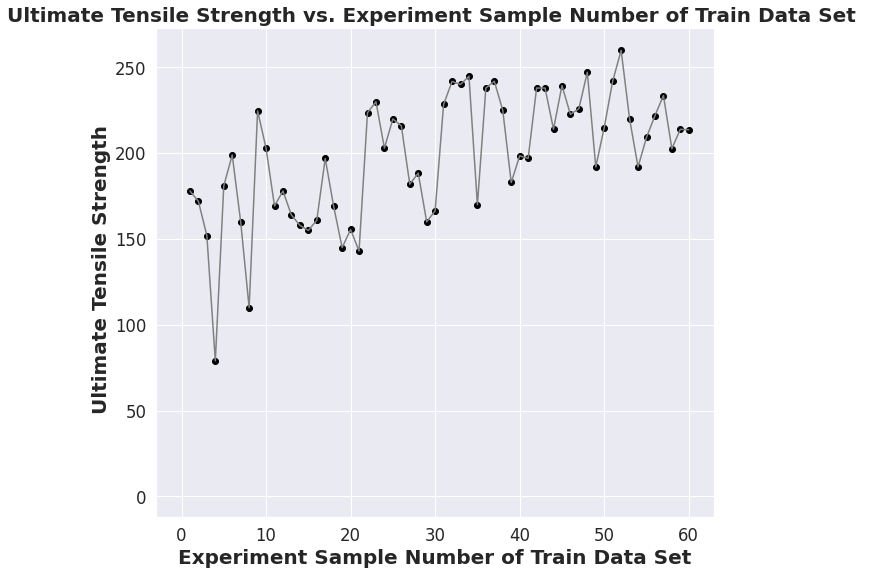

In [33]:
size=train.shape
inputx=[]
inputy=[]
for i in range(1,size[0]+1):
  inputx.append(i)
for i in range(size[0]):
  inputy.append(Y_train[i])

sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize =(10,9))
plt.scatter(inputx,inputy,color="black")
plt.plot(inputx,inputy,0.8,color ='grey')
plt.xlabel(' Experiment Sample Number of Train Data Set ', fontsize=20,fontweight='bold')
plt.ylabel(' Ultimate Tensile Strength', fontsize=20,fontweight='bold')
plt.title ('Ultimate Tensile Strength vs. Experiment Sample Number of Train Data Set ',fontsize=20,fontweight='bold')

# **To store r2_score of different algorithms**

In [15]:
r2_score=[]

# **Decision Tree**

In [16]:
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)

y_predict_br=dt.predict(X_test)

r2=metrics.r2_score(Y_test,y_predict_br)
mse=metrics.mean_squared_error(Y_test,y_predict_br)
rmse = np.sqrt(mse)

print("R2 score associated with Decision Tree Regression is :", r2)

r2_score.append(r2)

R2 score associated with Decision Tree Regression is : 0.79664934913618


# **Bagging Regressor**

In [19]:
BReg=BaggingRegressor(tree.DecisionTreeRegressor())
BReg.fit(X_train,Y_train)

y_predict_br=BReg.predict(X_test)

r2=metrics.r2_score(Y_test,y_predict_br)
mse=metrics.mean_squared_error(Y_test,y_predict_br)
rmse = np.sqrt(mse)

print("R2 score associated with Decision Tree Regression is :", r2)

r2_score.append(r2)

R2 score associated with Decision Tree Regression is : 0.8587822024029967


# **RandomForestRegressor**

In [20]:
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)

y_predict_rf=rf.predict(X_test)

r2=metrics.r2_score(Y_test,y_predict_rf)

print("R2 score associated with Decision Tree Regression is :", r2)

r2_score.append(r2)

R2 score associated with Decision Tree Regression is : 0.8215985082306877


# **Basic GradientBoostingRegressor**

In [21]:
reg = GradientBoostingRegressor()
reg.fit(X_train, Y_train)

y_predict_reg=reg.predict((X_test))

r2=metrics.r2_score(Y_test,y_predict_reg)

print("R2 score associated with Decision Tree Regression is :", r2)

r2_score.append(r2)

R2 score associated with Decision Tree Regression is : 0.8337141980430541


# **Basic XGBRegressor**

In [24]:
xgbr = XGBRegressor()
xgbr.fit(X_train, Y_train)

y_predict_xgbr=xgbr.predict((X_test))

r2=metrics.r2_score(Y_test,y_predict_xgbr)

print("R2 score associated with Decision Tree Regression is :", r2)

r2_score.append(r2)

[13:37:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score associated with Decision Tree Regression is : 0.8060878597315604


# **Basic CatBoost**

In [46]:
cbrb = CatBoostRegressor()

cbrb.fit(X_train, Y_train,verbose=250)

y_predict_cbrb=cbrb.predict((X_test))
print(y_predict_cbrb)


r2=metrics.r2_score(Y_test,y_predict_cbrb)

r2_score.append(r2)

print("R2 score associated with Decision Tree Regression is :", r2)

Learning rate set to 0.023654
0:	learn: 35.9723999	total: 306us	remaining: 306ms
250:	learn: 14.1298656	total: 24.2ms	remaining: 72.2ms
500:	learn: 9.4801418	total: 50.8ms	remaining: 50.6ms
750:	learn: 7.3885881	total: 75.7ms	remaining: 25.1ms
999:	learn: 6.6690850	total: 101ms	remaining: 0us
[128.46388926 184.99543314 209.03024683 182.07626434 195.23407688
 212.03979632 233.20513939 217.45907712]
R2 score associated with Decision Tree Regression is : 0.8900040861045664


# **Plotting R2 Score of default models**



<Figure size 432x288 with 0 Axes>

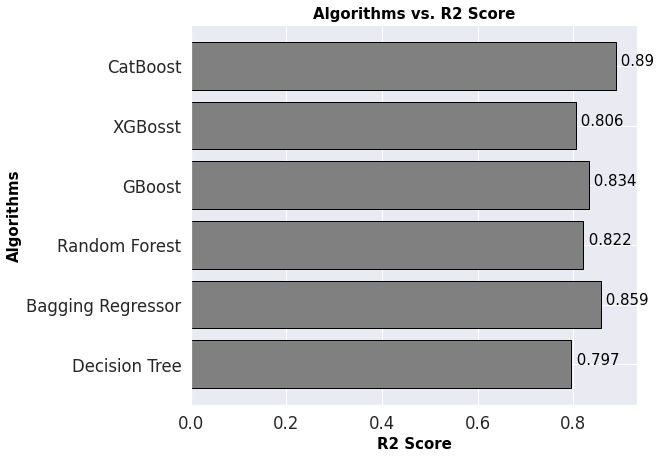

<Figure size 432x288 with 0 Axes>

In [27]:
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize =(8, 7))

algo=['Decision Tree','Bagging Regressor','Random Forest','GBoost','XGBosst','CatBoost']

plt.barh(algo,r2_score,0.8,color ='grey',edgecolor ='black')
plt.xlabel('R2 Score', fontsize=15,color='black', fontweight='bold')
plt.ylabel('Algorithms', fontsize=15,color='black', fontweight='bold')
plt.title ('Algorithms vs. R2 Score',fontsize=15,color='black', fontweight='bold')

y=[]
x=algo

for i in range(len(r2_score)):
  y.append(round(r2_score[i],3))

for i_x,i_y in zip(y,x):
  plt.text(i_x, i_y,'\n\n {}'.format(i_x),fontsize=15, color='black')

plt.figure()

# **Cat Boost Regressor tunning**
Based on the R2 scores on the Regression algorithms it is evident that CatBoost Regressor is the best model and hyperparameter is done on it to improve the R2 Score

In [ ]:
from sklearn.model_selection import GridSearchCV

model_CBR = CatBoostRegressor()
parameters = {'depth'          : [3,4,5,6],
              'learning_rate'  : [0.345566],
              'iterations'     : [250,350,475],
              'l2_leaf_reg'    :[3.2211,4.2211],
              'bagging_temperature':[4,5]
                 }

grid = GridSearchCV(estimator=model_CBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, Y_train)

grid_search_result = model_CBR.grid_search(parameters, 
                                       X=X_train, 
                                       y=Y_train,
                                       plot=True)

In [52]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 -3.0322756545705842

 The best parameters across ALL searched params:
 {'bagging_temperature': 4, 'depth': 3, 'iterations': 475, 'l2_leaf_reg': 4.2211, 'learning_rate': 0.345566}


# **Tunned CatBoost Model**
 The best parameters across all searched parameters are selected and implemented to improve the R2 Score

In [ ]:
cbr = CatBoostRegressor(task_type="GPU",loss_function='RMSE',iterations=475,learning_rate=0.345566,depth=3,l2_leaf_reg=3.2211,bagging_temperature=4)
cbr.fit(X_train, Y_train,plot=True)

y_predict_cbr=cbr.predict((X_test))
print(y_predict_cbr)

r2=metrics.r2_score(Y_test,y_predict_cbr)

print("\nR2 score associated with Decision Tree Regression is :", r2)

# **Printing Acutal UTS & Predicted UTS**


In [44]:
yp=[]
yt=[]
for i in range(0,8):
  yp.append(y_predict_cbr[i])
  yt.append(Y_test_check[i])

yp_df=pd.DataFrame(yp,columns = ['Predicted UTS'])
yt_df=pd.DataFrame(yt,columns = ['Actual UTS'])

yp_yt_df=pd.concat([yt_df,yp_df],axis=1)
yp_yt_df

,Actual UTS,Predicted UTS
0,135.00,133.853556
1,192.00,194.459808
2,185.00,202.256890
3,182.00,181.990304
4,193.00,195.345042
5,214.00,213.966204
6,232.86,232.913430
7,217.34,216.314003


# **Ultimate Tensile Strength vs. Experiment Sample Number**

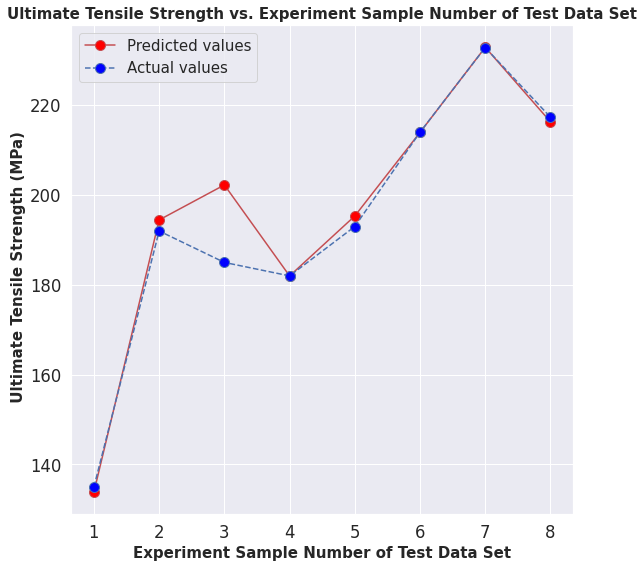

In [45]:
sns.set(font_scale=1.5)

a=[]
for i in range(1,9):
  a.append(i)

plt.figure(figsize=(9,9))

plt.plot(a,yp,"r-",marker='.', markerfacecolor='red', markersize=20,label='Predicted values')
plt.plot(a,yt,"b-",marker='.', markerfacecolor='blue', markersize=20,label='Actual values',linestyle='dashed')

plt.xlabel('Experiment Sample Number of Test Data Set', fontsize=15,fontweight='bold')
plt.ylabel(' Ultimate Tensile Strength (MPa)', fontsize=15,fontweight='bold')
plt.title ('Ultimate Tensile Strength vs. Experiment Sample Number of Test Data Set',fontsize=15,fontweight='bold')
plt.legend(fontsize=15)

# **Plotting CatBoost Regressor Tree**
0 --> Rotational Speed (RPM)

1 --> Welding Speed (mm/min)

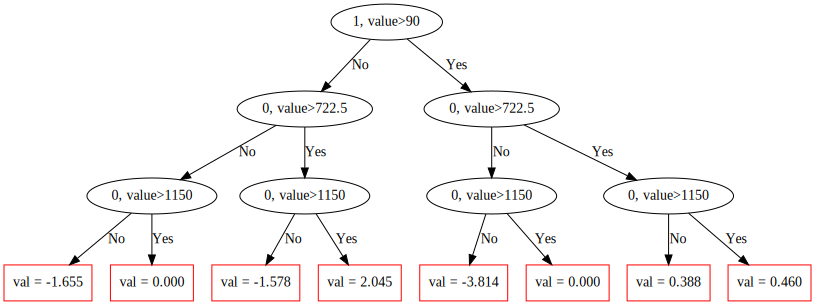

In [ ]:
cbr.plot_tree(tree_idx=0, pool=None)

# **Predicting Values using gradio**

In [ ]:
!pip install gradio

In [54]:
import gradio 

def pre(rotational_speed,welding_speed):
  result = np.array([[rotational_speed,welding_speed]])
  r=round(float(cbr.predict(result)),2)

  return r 

gradio.Interface(pre, inputs=[gradio.inputs.Slider(500, 4600),gradio.inputs.Slider(20,360)],outputs="text").launch(share=True) 

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://31414.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7863/',
 'https://31414.gradio.app')